(trees)=

# Decision Trees

Decision trees are a predictive modeling approach that uses probability trees to either predict a continous value or predict a classification that the data fits into. 

**Pros:**

* Easy to understand and visualize
* Easy to figure out why the model is making a certain prediction
* Doesn't need as much data preparation as other prediction methods

**Cons:**

* Sometimes decision trees can get too complex and overfit the data
* Small variations in the data could cause different trees to be created which can drastically change the model's output



## Concepts

The goal of a decision tree algorithm to create a model that predicts the value
of a target variable by learning simple decision rules inferred from the data
features. A tree can be seen as a piecewise constant approximation.

### Algorithm Formulation
At a given node, find the best split that minimizes some impurity or loss
measure $H$ after the split. Let $Q_m$ be the data at node $m$ with sample size
$n_m$. Let $\theta$ be a candidate split (which may consists of a candidate
threshold for candidate feature).  Suppose that after the split, $Q_{m,l}$ is
the left node data with sample size $n_{m,l}$ and $Q_{m,r}$ is the right node
data with sample size $n_{m,r}$. The quality of the split is measured by
\begin{equation*}
G(Q_m, \theta) = \frac{n_{m, l}}{n_m} H(Q_{m, l}(\theta))
 + \frac{n_{m,r}}{n_m} H(Q_{m, r}(\theta)).
\end{equation*}
The algorithm set
\begin{equation*}
\theta^* = \arg\min_{\theta} G(Q_m, \theta).
\end{equation*}

Recursively find the best split for each child node.

+ Stopping: until a the maximum tree depth is reached or all node sample size is
  below a preset threshold.
+ Pruning: reduces the complexity of the final classifier, and hence improves
  predictive accuracy by the reduction of overfitting.


### Metrics

See `sklearn` documentation for [details](https://scikit-learn.org/stable/modules/tree.html#classification-criteria).

+ Classification
    - Gini  
	$$H(Q_m) = \sum_{k=1} p_{mk} (1 - p_{mk})$$
    - Entropy 
	$$H(Q_m) = - \sum p_{mk} \log p_{mk}$$
    - Misclassification 
	$$H(Q_m) = 1 - \max_k p_{mk}$$

+ Regression
    - Mean squared error
    - Half Poisson deviance (for count targets)
    - Mean absolute error (slower than MSE; more robust)
	
### Confusion Matrix

See `sklearn` example for
[details](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html?highlight=confusion).

See definitions on [Wiki](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a matrix layout of the results of a classification
algorithm, where each row of the matrix represents the instances in an actual
class while each column represents the instances in a predicted class, or vice
versa.

+ True positive (TP)
+ False positive (FP)
+ True negative (TN)
+ False negative (FN)

Metrics for evaluating classification:

+ Precision:
  $$\frac{\text{TP}}{\text{TP} + \text{FP}}$$
+ Recall (sensitivity):
  $$\frac{\textt{TP}}{\text{TP} + \text{FP}}$$
+ F-beta score:
  $$(1 + \beta^2) \frac{1}{\frac{\beta^2}{\text{recall}} +
  \frac{1}{\text{recision}}}$$
  where $\beta$ means that recall is considered $\beta$ times as important as
  precision. When $\beta = 1$, the two are considered equally important.


From Wiki:

> In a classification task, a precision score of 1.0 for a class C means that
> every item labelled as belonging to class C does indeed belong to class C (but
> says nothing about the number of items from class C that were not labelled
> correctly) whereas a recall of 1.0 means that every item from class C was
> labelled as belonging to class C (but says nothing about how many items from
> other classes were incorrectly also labelled as belonging to class C). 


## Simple Classification Example

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

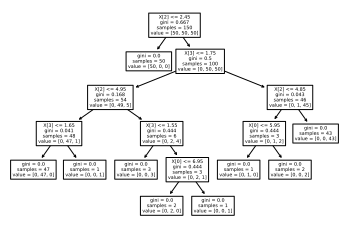

In [1]:
## configure the inline figures to of svg format
%config InlineBackend.figure_formats = ['svg']

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

## Data Cleaning

Import data and add a binary column for if a person was injured or not

Can't use strings in decision trees so to fix this we can change each borough to a number
EX: Bronx = 1, Brooklyn = 2

In [2]:
import pandas as pd
import numpy as np

nyc_collisions = pd.read_csv("../data/nyc_mv_collisions_202201.csv")

nyc_collisions["time"] = [x.split(":")[0] for x in nyc_collisions["CRASH TIME"]]
nyc_collisions["time"] = [int(x) for x in nyc_collisions["time"]]

nyc_collisions["injury_binary"] = nyc_collisions["NUMBER OF PERSONS INJURED"].map(lambda x: 1 if x>0 else 0)
nyc_collisions["num_borough"] = nyc_collisions["BOROUGH"].map(lambda x: 1 if x=="BRONX" else 0)
nyc_collisions["num_borough"] = nyc_collisions["BOROUGH"].map(lambda x: 2 if x=="BROOKLYN" else 0)
nyc_collisions["num_borough"] = nyc_collisions["BOROUGH"].map(lambda x: 3 if x=="QUEENS" else 0)
nyc_collisions["num_borough"] = nyc_collisions["BOROUGH"].map(lambda x: 4 if x=="MANHATTAN" else 0)
nyc_collisions["num_borough"] = nyc_collisions["BOROUGH"].map(lambda x: 5 if x=="STATEN ISLAND" else 0)

nyc_collisions.rename(columns={"NUMBER OF PERSONS KILLED": "num_ppl_killed"}, inplace=True)
nyc_collisions.rename(columns={"NUMBER OF PERSONS INJURED": "num_ppl_injured"}, inplace=True)



nyc_collisions['injury_binary'].value_counts()

0    5311
1    2348
Name: injury_binary, dtype: int64

## Classification Decision Tree Model
Select columns to use in our decision tree model. 

Don't want to use columns such as number of pedestrians injured because that heavily affects our target variable

We also split our dataset into a training set and a test set to avoid overfitting the data

We are trying to predict if someone was injured or not in a crash using all of the columns in `feature_cols`

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

feature_cols = ['time', 'num_borough', 'NUMBER OF MOTORIST KILLED',
                'NUMBER OF CYCLIST KILLED',
                'NUMBER OF PEDESTRIANS KILLED']
x = nyc_collisions[feature_cols] # Features
y = nyc_collisions.injury_binary # Target variable

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=12) # 80% training and 20% test

We then set up our decision tree and use it to predict on the test set. This example is a classification
example so it will predict a 0 or 1 based on if someone was injured or not in the crash (1=injured)

We then can print out the accuracy of our model and a confusion matrix to see its predictions

In [4]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6977806788511749
[[1064    3]
 [ 460    5]]


We can plot this model using the sklearn plotting function

[Text(0.6271067415730337, 0.9583333333333334, 'X[0] <= 16.5\ngini = 0.426\nsamples = 6127\nvalue = [4244, 1883]'),
 Text(0.46207865168539325, 0.875, 'X[2] <= 0.5\ngini = 0.405\nsamples = 4226\nvalue = [3035, 1191]'),
 Text(0.351123595505618, 0.7916666666666666, 'X[1] <= 2.5\ngini = 0.404\nsamples = 4222\nvalue = [3034, 1188]'),
 Text(0.19662921348314608, 0.7083333333333334, 'X[0] <= 5.5\ngini = 0.403\nsamples = 4110\nvalue = [2962, 1148]'),
 Text(0.1348314606741573, 0.625, 'X[0] <= 4.5\ngini = 0.386\nsamples = 940\nvalue = [694, 246]'),
 Text(0.11235955056179775, 0.5416666666666666, 'X[0] <= 3.5\ngini = 0.391\nsamples = 792\nvalue = [581, 211]'),
 Text(0.0898876404494382, 0.4583333333333333, 'X[0] <= 2.5\ngini = 0.385\nsamples = 641\nvalue = [474, 167]'),
 Text(0.06741573033707865, 0.375, 'X[0] <= 1.5\ngini = 0.393\nsamples = 535\nvalue = [391, 144]'),
 Text(0.0449438202247191, 0.2916666666666667, 'X[0] <= 0.5\ngini = 0.389\nsamples = 405\nvalue = [298, 107]'),
 Text(0.0224719101123595

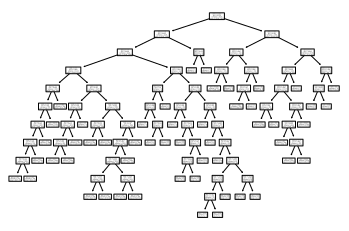

In [5]:
tree.plot_tree(clf)

We can plot this same exact model using the graphviz package and we see it looks much better

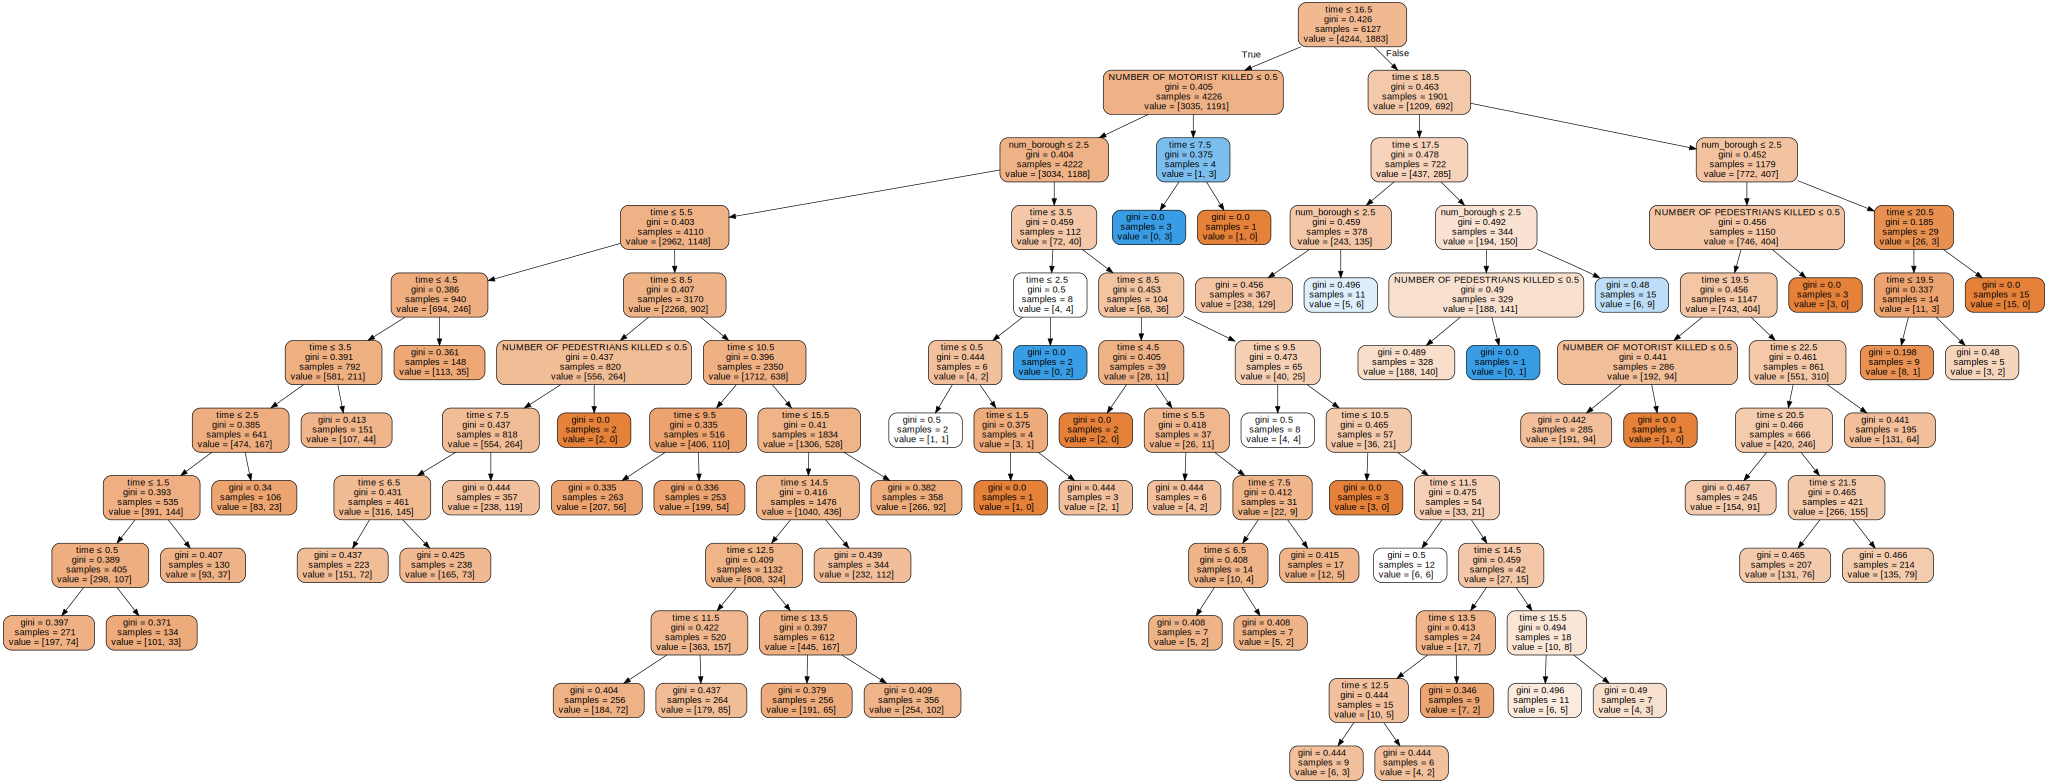

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=None,
                                filled=True, rounded=True,  
                      special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="svg") 
graph

We can run this exact same decision tree but try to optimize its performance by changing parameters
such as max_depth to set how many layers our tree is able to go until

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

feature_cols = ['time', 'num_borough', 
                'NUMBER OF MOTORIST KILLED',
                'NUMBER OF CYCLIST KILLED',
                'NUMBER OF PEDESTRIANS KILLED']
x = nyc_collisions[feature_cols] # Features
y = nyc_collisions.injury_binary # Target variable

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=12) # 80% training and 20% test

clf = tree.DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6971279373368147
[[1067    0]
 [ 464    1]]


We can see this change visually by re-running our code to graph the tree

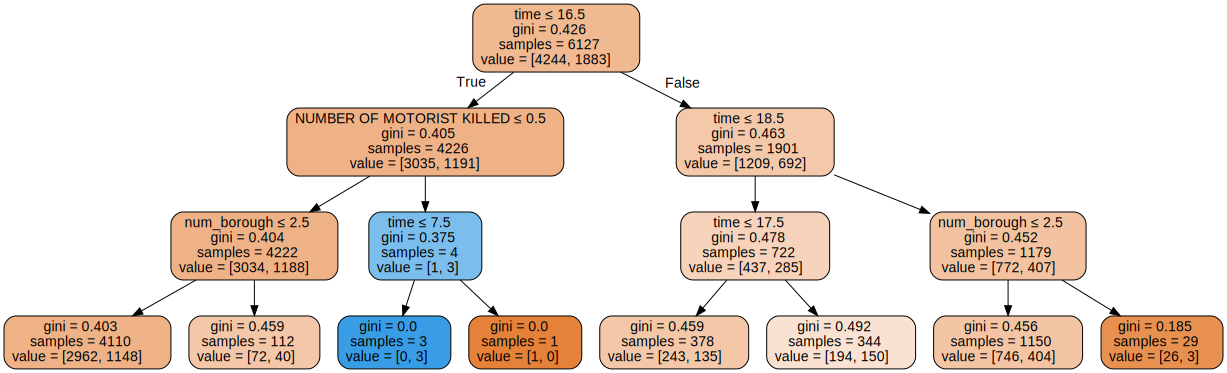

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_cols,  
                                class_names=None,
                                filled=True, rounded=True,  
                                special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="svg") 
graph

## Regression Decision Tree Model

In this example instead of classying a target variable into 0 or 1 we will use a decision tree for regression

The set-up is exactly the same as classification where we select feature columns, a target variable
and split the data into a training and test data set

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics

feature_cols2 = ['time', 'num_borough', 
                 'NUMBER OF MOTORIST KILLED',
                 'NUMBER OF CYCLIST KILLED',
                 'NUMBER OF PEDESTRIANS KILLED']
x = nyc_collisions[feature_cols2] # Features
y = nyc_collisions.num_ppl_injured  #Target variable

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=12) # 80% training and 20% test

In a classification problem we can use accuracy and a confusion matrix to gauge a model's effectiveness but 
that is not the case in a regression problem. 

Here we use mean absolute error to judge our model

To show what the model is doing, we create another variable for the absolute value of the difference between
the actual and predicted values.

In [10]:
rgr = tree.DecisionTreeRegressor()

# Train Decision Tree Regressor
rgr = rgr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = rgr.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df["diff"] = abs(df["Actual"] - df["Predicted"])
df.sort_values(by = ['diff'], inplace = True)

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

df.head()

Mean Absolute Error: 0.5601416714129356


,Actual,Predicted,diff
4880,0,0.0,0.0
4058,0,0.0,0.0
5954,0,0.0,0.0
2226,0,0.0,0.0
6532,0,0.0,0.0


Here we can sort by descending order to show which of our predictions were the worst.

In [11]:
df.sort_values(by=['diff'], ascending=False,inplace=True)
df.head()

,Actual,Predicted,diff
7258,5,0.512077,4.487923
5363,5,0.518293,4.481707
1901,5,1.000000,4.000000
3360,4,0.339844,3.660156
6313,4,0.373596,3.626404


Similarly to a classification problem we can still plot the resulting decision tree

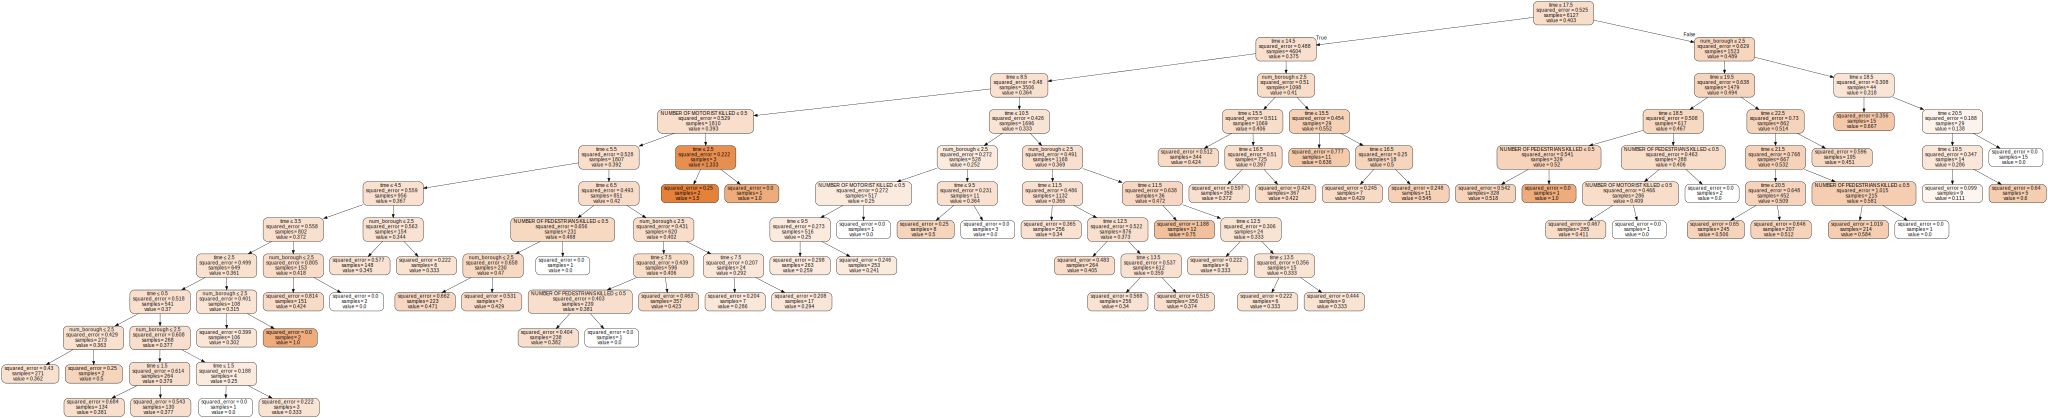

In [12]:
dot_data = tree.export_graphviz(rgr, out_file=None, 
                                feature_names=feature_cols2,  
                                class_names=None,
                                filled=True, rounded=True,  
                      special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="svg") 
graph